In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.3)

In [8]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

### Rastrigin function

In [4]:
# Create bounds  (Rastrigin function is bounded within [-5.12, 5.12])
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)

In [5]:
%%time
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO with bounds argument
optimizer = ps.single.GlobalBestPSO(n_particles=5, dimensions=2, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(fx.rastrigin, iters=100)

2023-11-21 19:52:09,820 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.995
2023-11-21 19:52:09,967 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9950668735612886, best pos: [ 2.24964517e-04 -9.95660825e-01]


CPU times: total: 188 ms
Wall time: 153 ms


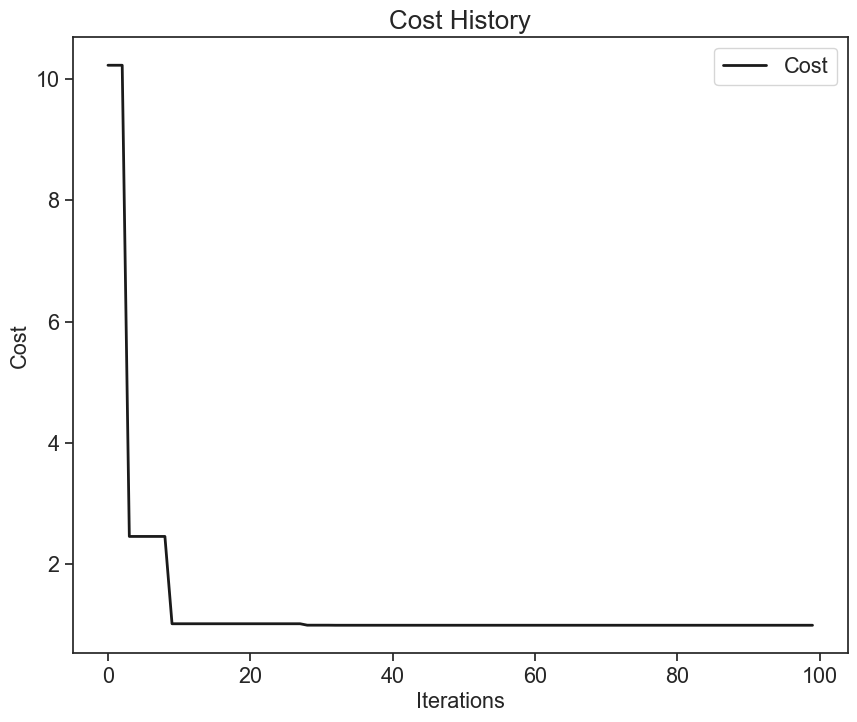

In [6]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

### Rosenbrock function

In [35]:
# create a parameterized version of the classic Rosenbrock unconstrained optimzation function
def rosenbrock_with_args(x, a, b, c=0):
    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    # print(x)
    return f

In [36]:
# instatiate the optimizer
x_max = 10 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=7, dimensions=2, options=options, bounds=bounds)

In [37]:
# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(
    rosenbrock_with_args, iters=100, verbose=True,
    a=1, b=100, c=0
)

2023-11-22 01:20:32,613 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████|100/100, best_cost=10
2023-11-22 01:20:32,682 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.000054959279424, best pos: [1.00737919 1.01488403]


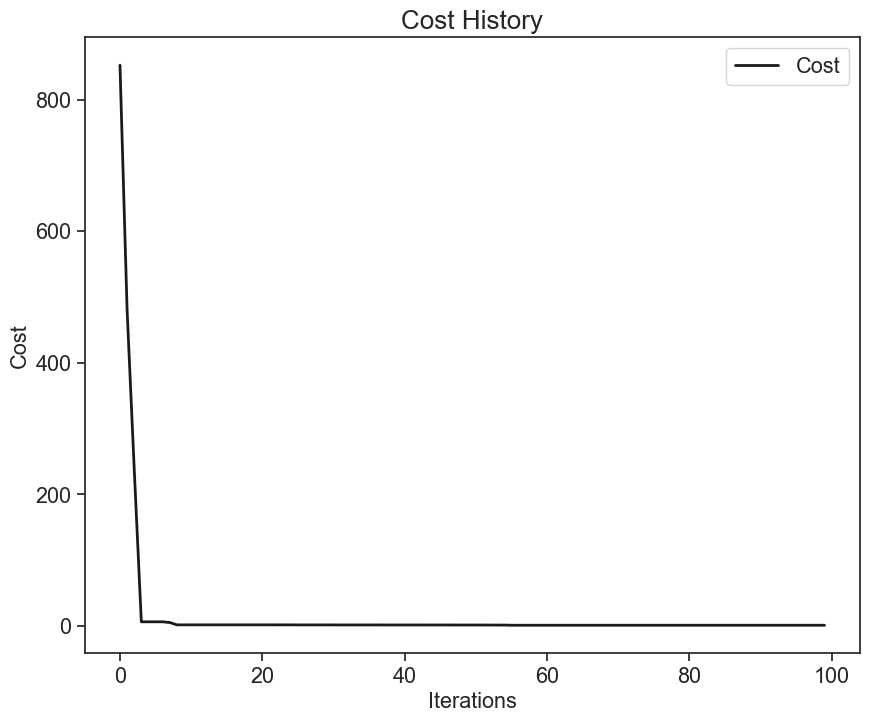

In [34]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()